In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('sonar.csv')
data.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [3]:
df=pd.DataFrame(data=data)
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [4]:
df.shape

(208, 61)

In [5]:
df.dtypes

attribute_1     float64
attribute_2     float64
attribute_3     float64
attribute_4     float64
attribute_5     float64
                 ...   
attribute_57    float64
attribute_58    float64
attribute_59    float64
attribute_60    float64
Class            object
Length: 61, dtype: object

In [6]:
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])

In [7]:
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [8]:
z=np.abs(zscore(df))
z

array([[0.39955135, 0.04064823, 0.02692565, ..., 0.17167808, 0.65894689,
        1.06973356],
       [0.70353822, 0.42163039, 1.05561832, ..., 0.44455424, 0.41985233,
        1.06973356],
       [0.12922901, 0.60106749, 1.72340448, ..., 0.25276128, 0.25758223,
        1.06973356],
       ...,
       [1.00438083, 0.16007801, 0.67384349, ..., 0.03913824, 0.67887143,
        0.93481221],
       [0.04953255, 0.09539176, 0.13480381, ..., 0.70402047, 0.34015415,
        0.93481221],
       [0.13794908, 0.06497869, 0.78861924, ..., 0.29860448, 0.99479044,
        0.93481221]])

In [9]:
print(np.where(z>3))

(array([  2,   2,   2,   2,   2,   3,   3,   5,   5,  19,  19,  20,  21,
        22,  22,  22,  22,  22,  22,  22,  22,  33,  44,  44,  44,  65,
        85,  85,  87,  91,  91,  97,  97,  98,  98,  98,  98,  98,  98,
       101, 101, 105, 111, 111, 111, 112, 127, 127, 127, 129, 129, 129,
       131, 132, 132, 133, 133, 133, 134, 134, 134, 134, 135, 135, 135,
       135, 136, 136, 136, 136, 137, 137, 138, 138, 138, 140, 140, 140,
       140, 140, 141, 141, 142, 142, 142, 143, 143, 143, 144, 145, 145,
       146, 146, 146, 146, 146, 146, 146, 146, 146, 147, 147, 147, 147,
       147, 147, 147, 147, 161, 184, 186, 186, 186], dtype=int64), array([ 8,  9, 10, 11, 56, 38, 39, 13, 14,  4,  7,  5, 37, 38, 39, 40, 41,
       46, 47, 48, 49, 49, 39, 42, 43, 58,  1,  2, 56,  5,  6, 58, 59,  0,
        1,  2,  3,  4, 59, 12, 57, 55,  2,  3,  4, 57, 13, 54, 57,  0, 12,
       53,  0,  7,  8,  8,  9, 52,  0,  6,  7,  8,  7,  8, 53, 55,  0,  7,
        8, 51,  9, 10,  2, 47, 51, 45, 46, 48, 49, 50, 4

In [10]:
dfn=df[(z<3).all(axis=1)]
dfn.shape

(168, 61)

In [11]:
dfn.skew()

attribute_1     1.260141
attribute_2     1.305137
attribute_3     1.651471
attribute_4     1.237233
attribute_5     0.921870
                  ...   
attribute_57    1.378156
attribute_58    1.364882
attribute_59    1.464334
attribute_60    1.144572
Class           0.000000
Length: 61, dtype: float64

In [12]:
dfn.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,1
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,1


In [13]:
dfn.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.023518,0.030290,0.035176,0.043747,0.066641,0.095901,0.110491,0.115680,0.155424,0.185860,...,0.011507,0.009385,0.009588,0.007992,0.007257,0.006888,0.006327,0.006610,0.005667,0.500000
std,0.014052,0.021525,0.025846,0.027553,0.041237,0.049633,0.047619,0.060332,0.084019,0.103403,...,0.006988,0.005942,0.006043,0.005489,0.004246,0.004610,0.004381,0.004637,0.003622,0.501495
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005700,0.011700,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013000,0.013975,0.016875,0.023500,0.035775,0.063500,0.079325,0.073275,0.094700,0.104275,...,0.006475,0.004750,0.004775,0.003800,0.004175,0.003700,0.003275,0.003275,0.003000,0.000000
50%,0.020850,0.026800,0.029100,0.039400,0.059650,0.085450,0.102350,0.107450,0.142350,0.177200,...,0.009700,0.007900,0.008450,0.006850,0.006450,0.005600,0.005150,0.005650,0.004950,0.500000
75%,0.030850,0.042025,0.047450,0.056675,0.090525,0.123050,0.140275,0.149125,0.197625,0.252950,...,0.014925,0.012725,0.013025,0.010650,0.009700,0.009275,0.008775,0.008350,0.007550,1.000000
max,0.076200,0.121000,0.152600,0.149800,0.225200,0.261100,0.230400,0.348100,0.527600,0.596500,...,0.038600,0.026500,0.027100,0.029000,0.019800,0.024200,0.024400,0.024600,0.019800,1.000000


In [14]:
x=dfn.iloc[:,0:-1]


In [15]:
y=dfn.iloc[:,-1]

In [16]:
from sklearn.decomposition import PCA

In [17]:
xpca=PCA(n_components=15)

In [18]:
x=xpca.fit_transform(x)

In [19]:
x

array([[ 0.53875493,  0.55086154, -0.31581947, ..., -0.0848495 ,
        -0.22431499, -0.20436992],
       [-1.0946115 ,  0.92225087,  0.77914686, ...,  0.04523895,
         0.15183955,  0.06917803],
       [-0.06061299,  0.29442318,  0.59096689, ..., -0.29603693,
         0.29017796, -0.16077611],
       ...,
       [ 0.56369938, -0.90865883,  0.21152548, ..., -0.15753724,
         0.00871563, -0.00465437],
       [ 0.17998902, -0.87639692,  0.20283177, ..., -0.06083783,
        -0.01550583,  0.16013415],
       [ 0.15602373, -0.77595947,  0.01294476, ...,  0.0311489 ,
         0.03715796,  0.22074838]])

In [20]:
y.head()

0    1
1    1
4    1
6    1
7    1
Name: Class, dtype: int32

In [21]:
dx=pd.DataFrame(data=x)

In [22]:
dx.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.538755,0.550862,-0.315819,0.342100,0.206413,0.098454,0.442978,-0.390373,-0.028273,-0.232856,-0.062830,-0.156619,-0.084849,-0.224315,-0.204370
1,-1.094612,0.922251,0.779147,-0.479970,0.116465,0.367385,-0.142330,-0.332527,0.224608,-0.255447,0.055460,-0.071775,0.045239,0.151840,0.069178
2,-0.060613,0.294423,0.590967,-0.439526,0.142214,0.288649,0.161305,0.087322,0.472598,-0.211632,0.080697,0.070182,-0.296037,0.290178,-0.160776
3,-0.220735,0.464541,-0.170272,0.255457,0.278509,0.177397,-0.155218,0.535461,0.528404,0.199699,0.062400,0.502373,-0.080435,-0.043419,0.066841
4,-0.566242,-0.115173,0.058064,0.488738,0.491112,0.032908,0.053740,-0.318633,-0.127178,-0.119009,0.280434,0.123594,0.216089,-0.141708,-0.140713


In [23]:
dx.skew()

0     0.054957
1     0.431867
2     0.163338
3     0.014475
4     0.325498
5     0.328969
6     0.261947
7     0.149247
8     0.509282
9    -0.109020
10    0.607871
11    0.451660
12    0.060284
13    0.516968
14    0.049001
dtype: float64

In [24]:
dn=pd.concat([dx,y],axis=1)

In [25]:
dn.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Class
0,0.538755,0.550862,-0.315819,0.342100,0.206413,0.098454,0.442978,-0.390373,-0.028273,-0.232856,-0.062830,-0.156619,-0.084849,-0.224315,-0.204370,1.0
1,-1.094612,0.922251,0.779147,-0.479970,0.116465,0.367385,-0.142330,-0.332527,0.224608,-0.255447,0.055460,-0.071775,0.045239,0.151840,0.069178,1.0
2,-0.060613,0.294423,0.590967,-0.439526,0.142214,0.288649,0.161305,0.087322,0.472598,-0.211632,0.080697,0.070182,-0.296037,0.290178,-0.160776,NaN
3,-0.220735,0.464541,-0.170272,0.255457,0.278509,0.177397,-0.155218,0.535461,0.528404,0.199699,0.062400,0.502373,-0.080435,-0.043419,0.066841,NaN
4,-0.566242,-0.115173,0.058064,0.488738,0.491112,0.032908,0.053740,-0.318633,-0.127178,-0.119009,0.280434,0.123594,0.216089,-0.141708,-0.140713,1.0


In [26]:
dn.isnull().sum()

0        38
1        38
2        38
3        38
4        38
5        38
6        38
7        38
8        38
9        38
10       38
11       38
12       38
13       38
14       38
Class    38
dtype: int64

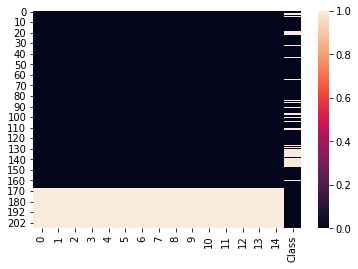

In [27]:
sns.heatmap(dn.isnull())

In [28]:
dn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 207
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       168 non-null    float64
 1   1       168 non-null    float64
 2   2       168 non-null    float64
 3   3       168 non-null    float64
 4   4       168 non-null    float64
 5   5       168 non-null    float64
 6   6       168 non-null    float64
 7   7       168 non-null    float64
 8   8       168 non-null    float64
 9   9       168 non-null    float64
 10  10      168 non-null    float64
 11  11      168 non-null    float64
 12  12      168 non-null    float64
 13  13      168 non-null    float64
 14  14      168 non-null    float64
 15  Class   168 non-null    float64
dtypes: float64(16)
memory usage: 27.4 KB


In [29]:
dn.shape

(206, 16)

In [30]:
dn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Class
0,0.538755,0.550862,-0.315819,0.342100,0.206413,0.098454,0.442978,-0.390373,-0.028273,-0.232856,-0.062830,-0.156619,-0.084849,-0.224315,-0.204370,1.0
1,-1.094612,0.922251,0.779147,-0.479970,0.116465,0.367385,-0.142330,-0.332527,0.224608,-0.255447,0.055460,-0.071775,0.045239,0.151840,0.069178,1.0
2,-0.060613,0.294423,0.590967,-0.439526,0.142214,0.288649,0.161305,0.087322,0.472598,-0.211632,0.080697,0.070182,-0.296037,0.290178,-0.160776,NaN
3,-0.220735,0.464541,-0.170272,0.255457,0.278509,0.177397,-0.155218,0.535461,0.528404,0.199699,0.062400,0.502373,-0.080435,-0.043419,0.066841,NaN
4,-0.566242,-0.115173,0.058064,0.488738,0.491112,0.032908,0.053740,-0.318633,-0.127178,-0.119009,0.280434,0.123594,0.216089,-0.141708,-0.140713,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [31]:
dn1=dn.copy()

In [32]:
dn1.dropna(axis=0,inplace=True)

In [33]:
dn1.shape

(130, 16)

In [34]:
dn1.skew()

0       -0.043281
1        0.317404
2        0.060083
3        0.016885
4       -0.305387
5        0.403950
6        0.124326
7        0.439829
8        0.538442
9       -0.149873
10       0.791440
11       0.221420
12       0.362138
13       0.997984
14      -0.176057
Class   -0.618474
dtype: float64

In [35]:
dn1[10]=np.log(dn1[10])

In [36]:
dn1[13]=np.log(dn1[13])

In [37]:
dn1.skew()

0       -0.043281
1        0.317404
2        0.060083
3        0.016885
4       -0.305387
5        0.403950
6        0.124326
7        0.439829
8        0.538442
9       -0.149873
10      -1.595805
11       0.221420
12       0.362138
13      -1.156590
14      -0.176057
Class   -0.618474
dtype: float64

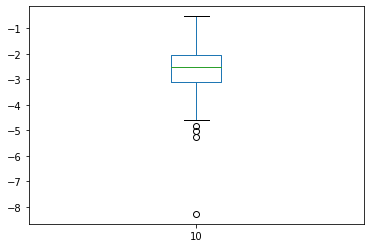

In [38]:
dn1[10].plot.box()

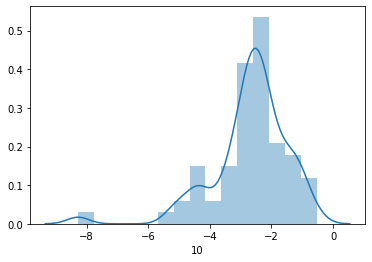

In [39]:
sns.distplot(dn1[10])

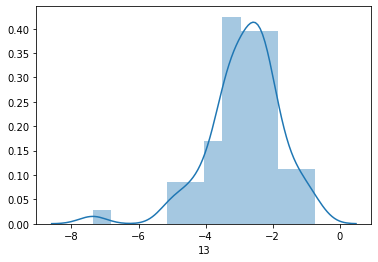

In [40]:
sns.distplot(dn1[13])

In [41]:
dn1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Class
0,0.538755,0.550862,-0.315819,0.342100,0.206413,0.098454,0.442978,-0.390373,-0.028273,-0.232856,NaN,-0.156619,-0.084849,NaN,-0.204370,1.0
1,-1.094612,0.922251,0.779147,-0.479970,0.116465,0.367385,-0.142330,-0.332527,0.224608,-0.255447,-2.892094,-0.071775,0.045239,-1.884931,0.069178,1.0
4,-0.566242,-0.115173,0.058064,0.488738,0.491112,0.032908,0.053740,-0.318633,-0.127178,-0.119009,-1.271418,0.123594,0.216089,NaN,-0.140713,1.0
6,0.047671,-0.849561,0.141548,0.290745,-0.299063,-0.094114,-0.030358,0.247915,0.243525,0.094130,NaN,-0.189148,-0.020542,-2.246554,-0.103185,1.0
7,1.235466,-0.047177,0.187706,-0.001866,-0.338005,-0.042255,0.025456,0.004710,0.106482,0.162959,-1.503960,0.034400,0.032037,NaN,0.038011,1.0


In [42]:
dn1.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10       65
11        0
12        0
13       66
14        0
Class     0
dtype: int64

In [43]:
dn1[10]=dn1[10].replace(np.NaN,dn1[10].mean())

In [44]:
dn1[13]=dn1[13].replace(np.NaN,dn1[13].mean())

In [45]:
dn1.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
Class    0
dtype: int64

In [46]:
dn1.skew()

0       -0.043281
1        0.317404
2        0.060083
3        0.016885
4       -0.305387
5        0.403950
6        0.124326
7        0.439829
8        0.538442
9       -0.149873
10      -2.230208
11       0.221420
12       0.362138
13      -1.628355
14      -0.176057
Class   -0.618474
dtype: float64

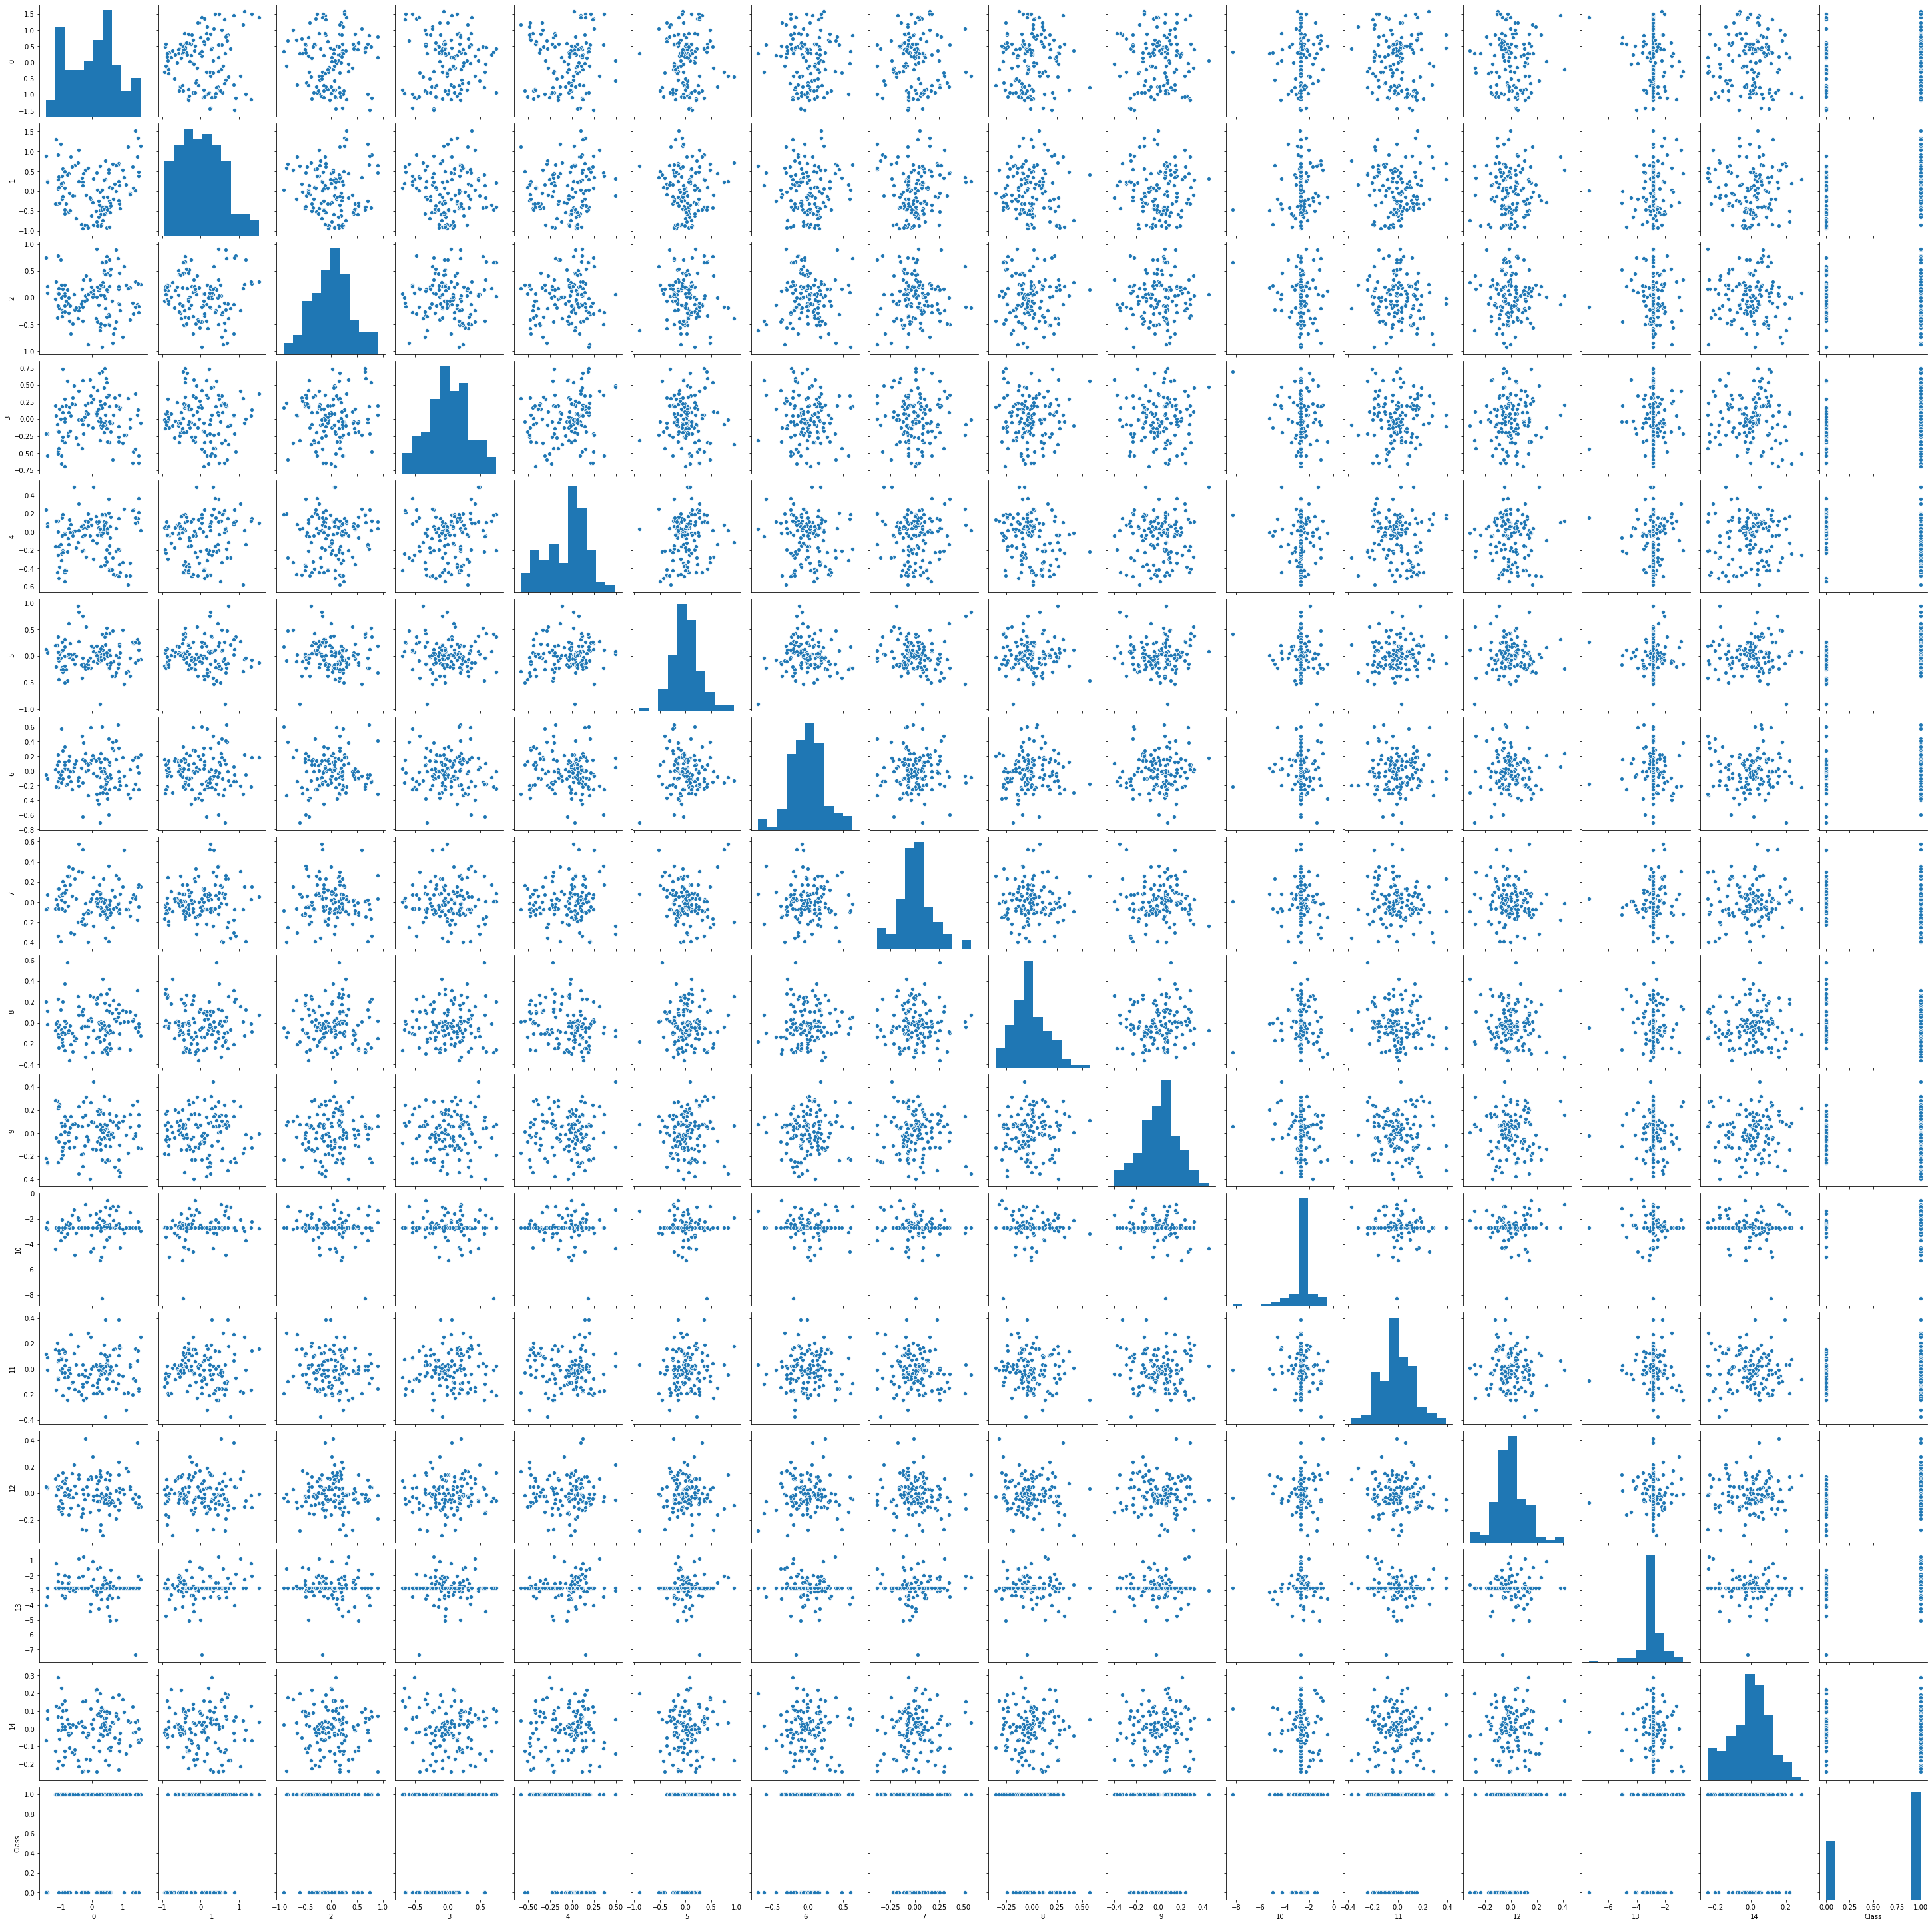

In [47]:
sns.pairplot(dn1)

In [48]:
maxr=0
for i in range(41,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.33)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('Maximum score corresponding to random state',finalr,'is',maxr)

accuracy score correspondng to random state 41 is: 0.875
accuracy score correspondng to random state 42 is: 0.8571428571428571
accuracy score correspondng to random state 43 is: 0.8928571428571429
accuracy score correspondng to random state 44 is: 0.7321428571428571
accuracy score correspondng to random state 45 is: 0.8214285714285714
accuracy score correspondng to random state 46 is: 0.8035714285714286
accuracy score correspondng to random state 47 is: 0.75
accuracy score correspondng to random state 48 is: 0.6785714285714286
accuracy score correspondng to random state 49 is: 0.75
accuracy score correspondng to random state 50 is: 0.7142857142857143
accuracy score correspondng to random state 51 is: 0.6964285714285714
accuracy score correspondng to random state 52 is: 0.6428571428571429
accuracy score correspondng to random state 53 is: 0.75
accuracy score correspondng to random state 54 is: 0.7678571428571429
accuracy score correspondng to random state 55 is: 0.75
accuracy score corr

In [49]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=0.33)

In [50]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
pred=lg.predict(x_test)

In [52]:
print('accuracy_score:',accuracy_score(y_test,pred))

accuracy_score: 0.8928571428571429


In [53]:
print(pred)

[0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1
 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0]


In [54]:
print('confusion matrix:','\n',confusion_matrix(y_test,pred)) 

confusion matrix: 
 [[23  1]
 [ 5 27]]


In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        24
           1       0.96      0.84      0.90        32

    accuracy                           0.89        56
   macro avg       0.89      0.90      0.89        56
weighted avg       0.90      0.89      0.89        56



In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
score=cross_val_score(lg,x,y,cv=10)
print(score)
print(score.mean())

[0.29411765 0.94117647 0.82352941 0.82352941 0.52941176 0.47058824
 0.94117647 0.94117647 0.5625     0.875     ]
0.7202205882352941


In [58]:
model=[KNeighborsClassifier(),DecisionTreeClassifier(),GaussianNB()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is
0.6964285714285714
[[22  2]
 [15 17]]
              precision    recall  f1-score   support

           0       0.59      0.92      0.72        24
           1       0.89      0.53      0.67        32

    accuracy                           0.70        56
   macro avg       0.74      0.72      0.69        56
weighted avg       0.77      0.70      0.69        56



accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=Non

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf=RandomForestClassifier(n_estimators=100,random_state=55)

In [68]:
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print(rf.score(x_train,y_train))

1.0


In [70]:
print(predr)

[0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1
 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0]


In [71]:
from sklearn.externals import joblib

In [72]:
joblib.dump(rf,'rfsonar.obj')

['rfsonar.obj']